<a href="https://colab.research.google.com/github/nourhan412/Task2-First_model-technocolabs/blob/main/Task2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import libraries:** 

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Retrieve Data:**

In [270]:
data=pd.read_csv("/content/drive/MyDrive/Project/prosperLoanData.csv")
data.head()  #get the first five rows of the data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# **Data Manipulation:**

In [271]:
print(data.shape) #number of rows and columns
data.columns

(113937, 81)


Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [272]:
data.describe() # an abbreviation about the numeric data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [273]:
data.info()   #some informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [274]:
data.duplicated().sum() #check the duplicates

0

# **Handling Dates:**

In [275]:
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'], infer_datetime_format=True)
data['LoanOriginationDate']=pd.to_datetime(data['LoanOriginationDate'], infer_datetime_format=True)
data['ClosedDate']=pd.to_datetime(data['ClosedDate'], infer_datetime_format=True)
data['DateCreditPulled']=pd.to_datetime(data['DateCreditPulled'], infer_datetime_format=True)
data['FirstRecordedCreditLine']=pd.to_datetime(data['FirstRecordedCreditLine'], infer_datetime_format=True)

In [276]:
data['FirstRecordedCreditLineDateDay'] = data['FirstRecordedCreditLine'].dt.day
data['FirstRecordedCreditLineDateMonth'] = data['FirstRecordedCreditLine'].dt.month
data['FirstRecordedCreditLineDateYear'] = data['FirstRecordedCreditLine'].dt.year
data.drop('FirstRecordedCreditLine',axis=1, inplace= True)

In [277]:
data['DateCreditPulledDay'] = data['DateCreditPulled'].dt.day
data['DateCreditPulledMonth'] = data['DateCreditPulled'].dt.month
data['DateCreditPulledYear'] = data['DateCreditPulled'].dt.year
data.drop('DateCreditPulled',axis=1, inplace= True)

In [278]:
data['ClosedDateDay'] = data['ClosedDate'].dt.day
data['ClosedDateMonth'] = data['ClosedDate'].dt.month
data['ClosedDateYear'] = data['ClosedDate'].dt.year
data.drop('ClosedDate',axis=1, inplace= True)

In [279]:
data['LoanOriginationDateDay'] = data['LoanOriginationDate'].dt.day
data['LoanOriginationDateMonth'] = data['LoanOriginationDate'].dt.month
data['LoanOriginationDateYear'] = data['LoanOriginationDate'].dt.year
data.drop('LoanOriginationDate',axis=1, inplace= True)

In [280]:
data['ListingCreationDateDay'] = data['ListingCreationDate'].dt.day
data['ListingCreationDateMonth'] = data['ListingCreationDate'].dt.month
data['ListingCreationDateYear'] = data['ListingCreationDate'].dt.year
data.drop('ListingCreationDate',axis=1, inplace= True)

# **Select only that occur after jun 2009:**

In [281]:
#data=data[(data['ListingCreationDateYear']>2009)|((data['ListingCreationDateYear']==2009) &(data['ListingCreationDateYear']>6))]
#data

In [282]:
print(data['ListingCreationDateYear'].unique())
data['ListingCreationDateMonth'].unique()

[2007 2014 2012 2013 2006 2010 2011 2008 2009 2005]


array([ 8,  2,  1, 10,  9, 12,  4,  5,  7, 11,  6,  3])

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 91 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   BorrowerAPR                          113912 non-null  float64
 6   BorrowerRate                         113937 non-null  float64
 7   LenderYield                          113937 non-null  float64
 8   EstimatedEffectiveYield              84853 non-null   float64
 9   EstimatedLoss                        84853 non-null   float64
 10  EstimatedReturn                      84853 non-null   float64
 11  ProsperRating

In [284]:
data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

# **Create Target column:**

In [285]:
def fun (row):
    if row['LoanStatus']=='Completed':
        return 1
    else:
        return 0
data['BorrowerStatus']=data.apply(lambda row:fun(row),axis=1)

In [286]:
data['BorrowerStatus'].unique()

array([1, 0])

In [287]:
data.drop('LoanStatus',axis=1,inplace=True)
data.columns

Index(['ListingKey', 'ListingNumber', 'CreditGrade', 'Term', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months'

# **Handling Missing values:**

In [288]:
data.isnull().sum()[data.isnull().sum() > 0]

CreditGrade                             84984
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                           1159
CurrentDelinquencies                      697
AmountDelinquent                  

In [289]:
cols=list()
percent=list()
for col in range(data.shape[1]):
    if(data.isnull().sum()[col]>0):
        cols.append(data.columns[col])
        percent.append(data.isnull().sum()[col]/data.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %
0,CreditGrade,74.588588
1,BorrowerAPR,0.021942
2,EstimatedEffectiveYield,25.526387
3,EstimatedLoss,25.526387
4,EstimatedReturn,25.526387
5,ProsperRating (numeric),25.526387
6,ProsperRating (Alpha),25.526387
7,ProsperScore,25.526387
8,BorrowerState,4.840394
9,Occupation,3.149109


In [290]:
for x in range(len(output)):
  if output.loc[x,"Percent %"]>50.0:
    data.drop(output.iat[x,0],axis=1,inplace=True)
mis=data.isnull().sum()[data.isnull().sum() > 0]
mis

BorrowerAPR                              25
EstimatedEffectiveYield               29084
EstimatedLoss                         29084
EstimatedReturn                       29084
ProsperRating (numeric)               29084
ProsperRating (Alpha)                 29084
ProsperScore                          29084
BorrowerState                          5515
Occupation                             3588
EmploymentStatus                       2255
EmploymentStatusDuration               7625
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
CurrentCreditLines                     7604
OpenCreditLines                        7604
TotalCreditLinespast7years              697
InquiriesLast6Months                    697
TotalInquiries                         1159
CurrentDelinquencies                    697
AmountDelinquent                       7622
DelinquenciesLast7Years                 990
PublicRecordsLast10Years                697
PublicRecordsLast12Months       

In [291]:
mis.index

Index(['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'FirstRecordedCreditLineDateDay',
       'FirstRecordedCreditLineDateMonth', 'FirstRecordedCreditLineDateYear'],
      dtype='object')

In [292]:
for x in mis.index:
  if data[x].dtype =='object':
    data[x].replace(np.nan,str(data[x].mode()),inplace=True) 
  elif data[x].dtype == 'int64' or data[x].dtype == 'float64' :
     data[x].replace(np.nan,data[x].mean(),inplace=True)
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Encode categories using OneHotEncoder:**

In [293]:
#Encoding
for col in range(data.shape[1]) :
    if data[data.columns[col]].dtype == 'object' :
        print(data.columns[col])

ListingKey
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
IncomeRange
LoanKey
LoanOriginationQuarter
MemberKey


In [294]:
data.drop('ProsperRating (Alpha)',axis=1,inplace=True) # it represented in numeric at ProsperRating (numeric)

In [295]:
for col in range(data.shape[1]) :
    if data[data.columns[col]].dtype == 'bool' :
        print(data.columns[col])

IsBorrowerHomeowner
CurrentlyInGroup
IncomeVerifiable


In [296]:
object_cols=['ListingKey','BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanKey','LoanOriginationQuarter','MemberKey',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
for col in object_cols:
    print(f"{col}  {data[col].nunique()}")

ListingKey  113066
BorrowerState  52
Occupation  68
EmploymentStatus  9
IncomeRange  8
LoanKey  113066
LoanOriginationQuarter  33
MemberKey  90831
IsBorrowerHomeowner  2
CurrentlyInGroup  2
IncomeVerifiable  2


In [297]:
data.drop(['ListingKey','LoanKey','MemberKey'],axis=1,inplace=True)

In [298]:
object_cols=['BorrowerState','Occupation','EmploymentStatus','IncomeRange','LoanOriginationQuarter',
             'IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
for col in range(len(object_cols)):
    tmp = onehotencoder.fit_transform(data[object_cols[col]].values.reshape(-1,1)).toarray()
    #To add this back into the original dataframe 
    OH_cols = pd.DataFrame(tmp, columns = [object_cols[col]+str(int(col)) for i in range(data[object_cols[col]].nunique())]) 
    # One-hot encoding removed index; put it back
    OH_cols.index = data.index
    # Remove categorical columns (will replace with one-hot encoding)
    num_cols = data.drop(object_cols[col], axis=1)
    # Add one-hot encoded columns to numerical features
    data = pd.concat([num_cols, OH_cols], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Columns: 241 entries, ListingNumber to IncomeVerifiable7
dtypes: float64(220), int64(21)
memory usage: 209.5 MB


In [299]:
data

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
0,193129,36,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1209647,36,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,81716,36,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,5.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [300]:
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Handling the outliers:**

In [301]:
#Using IQR method:-
for col in data.columns:
  x=data[col]
  Q1,Q3 = np.percentile(x, [25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  data[col]= x[((x <= upper) | (x > lower))]
  data[col].replace(np.nan,data[col].mean(),inplace=True)

data

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,LoanOriginationQuarter4,IsBorrowerHomeowner5,IsBorrowerHomeowner5,CurrentlyInGroup6,CurrentlyInGroup6,IncomeVerifiable7,IncomeVerifiable7
0,193129,36,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,4.072243,5.950067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1209647,36,0.12016,0.0920,0.0820,0.079600,0.024900,0.054700,6.000000,7.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,81716,36,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,4.072243,5.950067,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,658116,36,0.12528,0.0974,0.0874,0.084900,0.024900,0.060000,6.000000,9.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,909464,36,0.24614,0.2085,0.1985,0.183160,0.092500,0.090660,3.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,0.22354,0.1864,0.1764,0.164900,0.069900,0.095000,4.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113933,537216,36,0.13220,0.1110,0.1010,0.100700,0.020000,0.080700,6.000000,8.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
113934,1069178,60,0.23984,0.2150,0.2050,0.188280,0.102500,0.085780,3.000000,3.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
113935,539056,60,0.28408,0.2605,0.2505,0.244500,0.085000,0.159500,4.000000,5.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [302]:
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

# **Data Selection using Mutual Inforamtion method:**

In [303]:
X = data.copy()
Y = X["BorrowerStatus"]
X.drop("BorrowerStatus",axis=1,inplace=True)
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, Y, discrete_features)
selected=mi_scores[:21]  # show a few features with their MI scores
selected


LP_CustomerPrincipalPayments    0.558584
LP_CustomerPayments             0.245335
BorrowerAPR                     0.209974
LoanMonthsSinceOrigination      0.201922
EstimatedEffectiveYield         0.198681
LoanOriginationDateYear         0.195246
ListingCreationDateYear         0.193850
DateCreditPulledYear            0.193785
EstimatedReturn                 0.192330
EstimatedLoss                   0.179840
BorrowerRate                    0.170397
LenderYield                     0.166040
MonthlyLoanPayment              0.145769
LoanNumber                      0.144573
ListingNumber                   0.144573
LoanCurrentDaysDelinquent       0.083451
LP_InterestandFees              0.082757
Investors                       0.081364
LoanOriginalAmount              0.079000
ProsperScore                    0.076366
LP_ServiceFees                  0.074173
Name: MI Scores, dtype: float64

In [304]:
target=pd.DataFrame(Y)
target

,BorrowerStatus
0,1
1,0
2,1
3,0
4,0
...,...
113932,0
113933,0
113934,0
113935,1


In [305]:
best=[]
remain=[]
for x in selected.index:
  if selected[x] > 0.155:
    best.append(x)
  else:
    remain.append(x)
print(best)
print(remain)

['LP_CustomerPrincipalPayments', 'LP_CustomerPayments', 'BorrowerAPR', 'LoanMonthsSinceOrigination', 'EstimatedEffectiveYield', 'LoanOriginationDateYear', 'ListingCreationDateYear', 'DateCreditPulledYear', 'EstimatedReturn', 'EstimatedLoss', 'BorrowerRate', 'LenderYield']
['MonthlyLoanPayment', 'LoanNumber', 'ListingNumber', 'LoanCurrentDaysDelinquent', 'LP_InterestandFees', 'Investors', 'LoanOriginalAmount', 'ProsperScore', 'LP_ServiceFees']


In [306]:
best.append("BorrowerStatus")
best_features=data[best]
best_features

,LP_CustomerPrincipalPayments,LP_CustomerPayments,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedEffectiveYield,LoanOriginationDateYear,ListingCreationDateYear,DateCreditPulledYear,EstimatedReturn,EstimatedLoss,BorrowerRate,LenderYield,BorrowerStatus
0,9425.00,11396.1400,0.16516,78,0.168661,2007,2007,2007,0.096068,0.080306,0.1580,0.1380,1
1,0.00,0.0000,0.12016,0,0.079600,2014,2014,2014,0.054700,0.024900,0.0920,0.0820,0
2,3001.00,4186.6300,0.28269,86,0.168661,2007,2007,2007,0.096068,0.080306,0.2750,0.2400,1
3,4091.09,5143.2000,0.12528,16,0.084900,2012,2012,2012,0.060000,0.024900,0.0974,0.0874,0
4,1563.22,2819.8500,0.24614,6,0.183160,2013,2013,2013,0.090660,0.092500,0.2085,0.1985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,0.22354,11,0.164900,2013,2013,2013,0.095000,0.069900,0.1864,0.1764,0
113933,1997.16,2330.5500,0.13220,28,0.100700,2011,2011,2011,0.080700,0.020000,0.1110,0.1010,0
113934,183.15,546.7000,0.23984,3,0.188280,2013,2013,2013,0.085780,0.102500,0.2150,0.2050,0
113935,15000.00,21122.5600,0.28408,28,0.244500,2011,2011,2011,0.159500,0.085000,0.2605,0.2505,1


In [307]:
data.drop(best,axis=1,inplace=True)

# **Data Extraction Using PCA:**

In [308]:
# Standardize
X_scaled = (data - data.mean(axis=0)) / data.std(axis=0)
from sklearn.decomposition import PCA
# Create principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=data.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3
ListingNumber,0.255032,-0.184683,-0.119073
Term,0.116294,-0.031647,-0.022014
ProsperRating (numeric),0.097162,0.074601,0.099883
ProsperScore,0.047983,0.065336,0.137016
ListingCategory (numeric),0.035867,-0.114417,0.044909
...,...,...,...
IsBorrowerHomeowner5,0.126830,0.157865,0.007524
CurrentlyInGroup6,0.180225,-0.157702,0.013758
CurrentlyInGroup6,-0.180225,0.157702,-0.013758
IncomeVerifiable7,-0.004318,-0.043399,0.092239


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7b6fa36d0>,
      dtype=object)

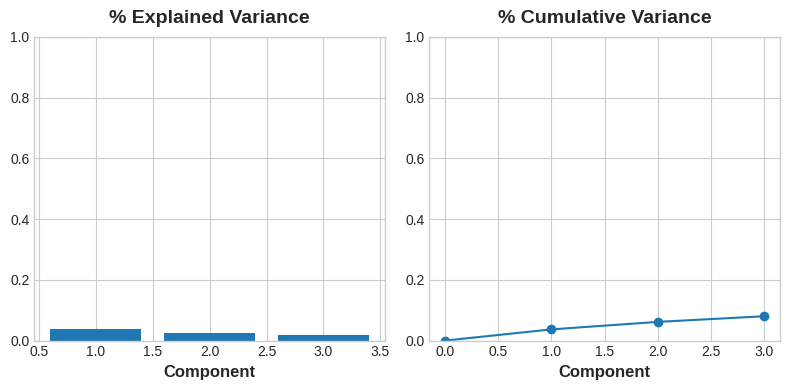

In [309]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [310]:
updated_data=pd.concat([best_features,X_pca],axis=1)
updated_data

,LP_CustomerPrincipalPayments,LP_CustomerPayments,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedEffectiveYield,LoanOriginationDateYear,ListingCreationDateYear,DateCreditPulledYear,EstimatedReturn,EstimatedLoss,BorrowerRate,LenderYield,BorrowerStatus,PC1,PC2,PC3
0,9425.00,11396.1400,0.16516,78,0.168661,2007,2007,2007,0.096068,0.080306,0.1580,0.1380,1,-3.585250,0.404856,2.667940
1,0.00,0.0000,0.12016,0,0.079600,2014,2014,2014,0.054700,0.024900,0.0920,0.0820,0,2.290869,-0.739654,-1.081066
2,3001.00,4186.6300,0.28269,86,0.168661,2007,2007,2007,0.096068,0.080306,0.2750,0.2400,1,-6.584637,1.479981,-1.463268
3,4091.09,5143.2000,0.12528,16,0.084900,2012,2012,2012,0.060000,0.024900,0.0974,0.0874,0,1.402593,-1.198735,1.309420
4,1563.22,2819.8500,0.24614,6,0.183160,2013,2013,2013,0.090660,0.092500,0.2085,0.1985,0,3.126036,1.492966,-1.922207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,0.22354,11,0.164900,2013,2013,2013,0.095000,0.069900,0.1864,0.1764,0,1.788199,-0.117577,-0.563418
113933,1997.16,2330.5500,0.13220,28,0.100700,2011,2011,2011,0.080700,0.020000,0.1110,0.1010,0,1.611690,0.375830,-1.776925
113934,183.15,546.7000,0.23984,3,0.188280,2013,2013,2013,0.085780,0.102500,0.2150,0.2050,0,2.327993,-1.408968,-2.317546
113935,15000.00,21122.5600,0.28408,28,0.244500,2011,2011,2011,0.159500,0.085000,0.2605,0.2505,1,0.353477,1.206450,2.196088


In [311]:
updated_data.isnull().sum()[updated_data.isnull().sum() > 0].sum()

0

In [312]:
data=updated_data
data

,LP_CustomerPrincipalPayments,LP_CustomerPayments,BorrowerAPR,LoanMonthsSinceOrigination,EstimatedEffectiveYield,LoanOriginationDateYear,ListingCreationDateYear,DateCreditPulledYear,EstimatedReturn,EstimatedLoss,BorrowerRate,LenderYield,BorrowerStatus,PC1,PC2,PC3
0,9425.00,11396.1400,0.16516,78,0.168661,2007,2007,2007,0.096068,0.080306,0.1580,0.1380,1,-3.585250,0.404856,2.667940
1,0.00,0.0000,0.12016,0,0.079600,2014,2014,2014,0.054700,0.024900,0.0920,0.0820,0,2.290869,-0.739654,-1.081066
2,3001.00,4186.6300,0.28269,86,0.168661,2007,2007,2007,0.096068,0.080306,0.2750,0.2400,1,-6.584637,1.479981,-1.463268
3,4091.09,5143.2000,0.12528,16,0.084900,2012,2012,2012,0.060000,0.024900,0.0974,0.0874,0,1.402593,-1.198735,1.309420
4,1563.22,2819.8500,0.24614,6,0.183160,2013,2013,2013,0.090660,0.092500,0.2085,0.1985,0,3.126036,1.492966,-1.922207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2238.38,3647.4000,0.22354,11,0.164900,2013,2013,2013,0.095000,0.069900,0.1864,0.1764,0,1.788199,-0.117577,-0.563418
113933,1997.16,2330.5500,0.13220,28,0.100700,2011,2011,2011,0.080700,0.020000,0.1110,0.1010,0,1.611690,0.375830,-1.776925
113934,183.15,546.7000,0.23984,3,0.188280,2013,2013,2013,0.085780,0.102500,0.2150,0.2050,0,2.327993,-1.408968,-2.317546
113935,15000.00,21122.5600,0.28408,28,0.244500,2011,2011,2011,0.159500,0.085000,0.2605,0.2505,1,0.353477,1.206450,2.196088


In [313]:
cols=list()
percent=list()
for col in range(data.shape[1]):
    if(data.isnull().sum()[col]>0):
        cols.append(data.columns[col])
        percent.append(data.isnull().sum()[col]/data.shape[0]*100)
merg={"column name":cols,"Percent %":percent}
output=pd.DataFrame(merg)
output

,column name,Percent %


In [314]:
mis=data.isnull().sum()[data.isnull().sum() > 0]
for x in mis.index:
  if data[x].dtype =='object' or  x=='BorroweStatus':
    data[x].replace(np.nan,str(data[x].mode()),inplace=True) 
  elif data[x].dtype == 'int64' or data[x].dtype == 'float64' :
     data[x].replace(np.nan,data[x].mean(),inplace=True)
data.isnull().sum()[data.isnull().sum() > 0].sum()

0

In [315]:
data["BorrowerStatus"]=data["BorrowerStatus"].astype(bool)
data["BorrowerStatus"].unique()

array([ True, False])

# **Logistic Regression Model:**

In [533]:
from sklearn.model_selection import train_test_split
X =data
X.drop('BorrowerStatus',axis=1) 
y = data['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)

In [534]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
model = linear_model.LogisticRegression(C=1,max_iter=15,n_jobs=100,solver='liblinear', random_state=200,penalty='l2')   #regularization parameters
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=1, max_iter=15, n_jobs=100, random_state=200,
                   solver='liblinear')

In [535]:
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [False False False False False]
Accuracy:  0.9260312445146568


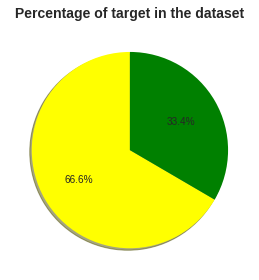

In [536]:
from matplotlib import pyplot as plt
sizes = data['BorrowerStatus'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [537]:
data['BorrowerStatus'].value_counts()

False    75863
True     38074
Name: BorrowerStatus, dtype: int64

# Balance the data:

In [538]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)


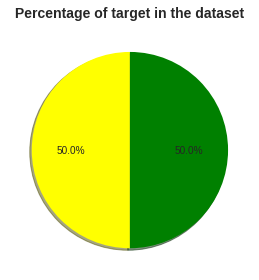

In [539]:
from matplotlib import pyplot as plt
sizes = y_rus.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

# **Logistic Regression Model After Balancing:**

In [540]:
train_X,test_X,train_y,test_y = train_test_split(x_rus,y_rus)

In [541]:
from sklearn import linear_model
model = linear_model.LogisticRegression(C=1,max_iter=15,n_jobs=100,solver='liblinear', random_state=200,penalty='l2')  #regularization parameters
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=1, max_iter=15, n_jobs=100, random_state=200,
                   solver='liblinear')

In [542]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True  True False False False]
Accuracy:  0.9170562588643169


# **Random Forest Model:**

In [543]:
from sklearn.model_selection import train_test_split
X =data
X.drop('BorrowerStatus',axis=1) 
y = data['BorrowerStatus'] 
X_train,test_X,y_train,test_y = train_test_split(X,y)
from sklearn.ensemble import RandomForestClassifier
models= RandomForestClassifier(max_depth=300,n_jobs=30,random_state=200)
models.fit(train_X,train_y)

RandomForestClassifier(max_depth=300, n_jobs=30, random_state=200)

In [544]:
y_pred = model.predict(test_X)
print(f'Prediction: {y_pred[:5]}')
# compute the accuracy and the print parameters used
print('Accuracy: ',accuracy_score(test_y,y_pred))

Prediction: [ True  True False False  True]
Accuracy:  0.931051430577497


In [545]:
#Done